In [38]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve


#Logistic
from sklearn.linear_model import LogisticRegression

# ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

# RandomForest
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data set
df = pd.read_csv("/content/drive/My Drive/부실기업예측 프로젝트/data/variable.csv", encoding="utf-8")
df.sector = df.sector.apply(lambda x : "manufacture" if x == 2 else "service")
df_dummy = pd.get_dummies(df['sector'])
df = pd.concat([df,df_dummy], axis = 1)
x = df[['x1','x2','x3','x4','om','ga','gs','ge',"manufacture","service"]]
y = df['bankrupt']

In [4]:
df.head()

,Unnamed: 0,name,code,year,sector,x1,x2,x3,x4,x5,om,ga,gs,ge,croe,cpb,bankrupt,manufacture,service
0,0,(주)대유플러스,300,2011,manufacture,-0.027601,0.013323,0.020035,0.369703,0.553239,0.036214,0.330708,0.417533,0.095775,-10.56,0.669980,0,1,0
1,1,(주)대유플러스,300,2012,manufacture,0.049332,-0.012951,-0.003058,0.255488,0.622598,-0.004911,0.006649,0.132851,0.154242,-11.56,-0.812564,0,1,0
2,2,(주)대유플러스,300,2013,manufacture,0.094337,-0.006652,0.038567,0.218075,0.662727,0.058194,0.048990,0.116602,0.120267,19.23,-0.207904,0,1,0
3,3,(주)대유플러스,300,2014,manufacture,0.047961,-0.019832,0.021306,0.180737,0.710024,0.030008,0.105457,0.184351,-0.683897,-11.49,-0.061619,0,1,0
4,4,(주)대유플러스,300,2015,manufacture,0.041981,-0.028575,0.021317,0.154693,0.631994,0.033730,0.110126,-0.011874,0.094340,-0.83,-0.029684,0,1,0


In [5]:
# Create training and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [6]:
# UnderSampling # 추출하는 기업을 다양화 시킬 수 있는 모델
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# summarize class distribution
print(Counter(y_train))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(x_train, y_train)
# summarize class distribution
print(Counter(y_under))

Counter({0: 2299, 1: 63})
Counter({0: 63, 1: 63})


In [7]:
model_3 = LogisticRegression()
model_3.fit(X_under, y_under)
model_3.score(X_under, y_under)

0.8333333333333334

In [8]:
test_predict_downsampled = model_3.predict(x_test)
print("Accuracy score :", accuracy_score(y_test, test_predict_downsampled), "ROC-AUC : ", roc_auc_score(y_test, test_predict_downsampled))
print(confusion_matrix(y_test, test_predict_downsampled))

Accuracy score : 0.8764805414551607 ROC-AUC :  0.8150000000000001
[[506  69]
 [  4  12]]


In [9]:
#RandomForest
forest_model = RandomForestClassifier()

forest_model.fit(X_under, y_under)
rf = forest_model.predict(X_under)
print(forest_model.score(X_under, y_under))
# confusion_matrix(y_under,rf)

1.0


In [10]:
y_predict = forest_model.predict(x_test)
print("Accuracy score :", accuracy_score(y_test, y_predict), "ROC-AUC : ", roc_auc_score(y_test, y_predict))
# confusion_matrix(y_test, test_predict)

Accuracy score : 0.8257191201353637 ROC-AUC :  0.8192934782608695


In [11]:
# ANN

# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                275       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [12]:
#ANN


classifier.fit(X_under, y_under, batch_size = 40, epochs = 200)


Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5159
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5238
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5476
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.6111
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.6270
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.6746
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.7143
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6836 - accuracy: 0.7302
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6803 - accuracy: 0.7619
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6757 - accuracy: 0.7619
Epoch 11/200
4/4 [===========

In [13]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
loss, accuracy = classifier.evaluate(x_test, y_test)
print('Loss : ', loss)
print('Accuracy : ', accuracy)
print("Roc-Auc :", roc_auc_score(y_test, y_pred))
print('Confusion Matrix : \n', cm)

19/19 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8646
Loss :  0.4293769598007202
Accuracy :  0.8646361827850342
Roc-Auc : 0.8089130434782609
Confusion Matrix : 
 [[499  76]
 [  4  12]]


In [14]:
#SVM
#정규화
sc = StandardScaler()
sc.fit(X_under)
x_train_std_down = sc.transform(X_under)
x_test_std_down = sc.transform(x_test)

svc = SVC(C=1.0, random_state=1, kernel='linear')

svc.fit(x_train_std_down, y_under)
y_predict = svc.predict(x_test_std_down)
 
# Measure the performance
print("Accuracy score :", accuracy_score(y_test, y_predict), "ROC-AUC : ", roc_auc_score(y_test, y_predict))
print(svc.score(x_test, y_predict))
print(confusion_matrix(y_test, y_predict))

f1 = f1_score(y_test, y_predict)
print('f1 score :', f1)

Accuracy score : 0.8494077834179357 ROC-AUC :  0.8314673913043479
0.6683587140439933
[[489  86]
 [  3  13]]
f1 score : 0.22608695652173916


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# 정규화

## STANDARD SCALER

In [15]:
#### Standard 정규화
sc = StandardScaler()
sc.fit(X_under)
x_train_std_down = sc.transform(X_under)
x_test_std_down = sc.transform(x_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [17]:
#Logistic

model_3 = LogisticRegression()
model_3.fit(x_train_std_down, y_under)
model_3.score(x_train_std_down, y_under)

test_predict_downsampled = model_3.predict(x_test_std_down)

print("Accuracy score :", accuracy_score(y_test, test_predict_downsampled), "ROC-AUC : ", roc_auc_score(y_test, test_predict_downsampled),  "Recall score : ",  recall_score(y_test,test_predict_downsampled), "Precision score : ",precision_score(y_test, test_predict_downsampled, average="micro"))
print(confusion_matrix(y_test, test_predict_downsampled))
f1 = f1_score(y_test, test_predict_downsampled)
print('f1 score :', f1)

Accuracy score : 0.8578680203045685 ROC-AUC :  0.8054347826086957 Recall score :  0.75 Precision score :  0.8578680203045685
[[495  80]
 [  4  12]]
f1 score : 0.22222222222222218


In [18]:
# ANN

classifier.fit(x_train_std_down, y_under, batch_size = 40, epochs = 200)



Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.5030 - accuracy: 0.7381
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.5007 - accuracy: 0.7460
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.4940 - accuracy: 0.7460
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.4844 - accuracy: 0.7540
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7619
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.7698
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4439 - accuracy: 0.7619
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.7619
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.7778
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.7778
Epoch 11/200
4/4 [===========

In [19]:
y_pred = classifier.predict(x_test_std_down)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
loss, accuracy = classifier.evaluate(x_test_std_down, y_test)
print('Loss : ', loss)
print('Accuracy : ', accuracy)
print("Roc-Auc :", roc_auc_score(y_test, y_pred))
print('Confusion Matrix : \n', cm)

f1 = f1_score(y_test, y_pred)
print('f1 score :', f1)

19/19 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.8037
Loss :  0.5759268999099731
Accuracy :  0.8037225008010864
Roc-Auc : 0.7776086956521739
Confusion Matrix : 
 [[463 112]
 [  4  12]]
f1 score : 0.1714285714285714


In [20]:
#RandomForest
forest_model.fit(x_train_std_down, y_under)
print(forest_model.score(x_train_std_down, y_under))

y_predict = forest_model.predict(x_test_std_down)
print("Accuracy score :", accuracy_score(y_test, y_predict), "ROC-AUC : ", roc_auc_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

f1 = f1_score(y_test, y_predict)
print('f1 score :', f1)

1.0
Accuracy score : 0.8223350253807107 ROC-AUC :  0.8479347826086956
[[472 103]
 [  2  14]]
f1 score : 0.21052631578947367


## MINMAXSCALER

In [21]:
### minmax scaler #######

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_under)
x_train_scaled = scaler.transform(X_under)
x_test_scaled = scaler.transform(x_test)

In [22]:
#SVM

svc = SVC(C=1.0, random_state=1, kernel='linear')

svc.fit(x_train_scaled, y_under)
y_predict = svc.predict(x_test_scaled)
 
# Measure the performance
print("Accuracy score :", accuracy_score(y_test, y_predict), "ROC-AUC : ", roc_auc_score(y_test, y_predict))
print(svc.score(x_test, y_predict))
print(confusion_matrix(y_test, y_predict))

f1 = f1_score(y_test, y_predict)
print('f1 score :', f1)

Accuracy score : 0.9069373942470389 ROC-AUC :  0.8002717391304348
0.17089678510998307
[[525  50]
 [  5  11]]
f1 score : 0.2857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
#Logistic

model_3 = LogisticRegression()
model_3.fit(x_train_scaled, y_under)
model_3.score(x_train_scaled, y_under)

test_predict_downsampled = model_3.predict(x_test_scaled)

print("Accuracy score :", accuracy_score(y_test, test_predict_downsampled), "ROC-AUC : ", roc_auc_score(y_test, test_predict_downsampled),  "Recall score : ",  recall_score(y_test,test_predict_downsampled), "Precision score : ",precision_score(y_test, test_predict_downsampled, average="micro"))
print(confusion_matrix(y_test, test_predict_downsampled))
f1 = f1_score(y_test, test_predict_downsampled)
print('f1 score :', f1)

Accuracy score : 0.8443316412859561 ROC-AUC :  0.7377173913043479 Recall score :  0.625 Precision score :  0.8443316412859561
[[489  86]
 [  6  10]]
f1 score : 0.1785714285714286


In [24]:
# ANN

classifier.fit(x_train_scaled, y_under, batch_size = 40, epochs = 200)


Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 2.3740 - accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 2.1159 - accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.8146 - accuracy: 0.5079
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5131 - accuracy: 0.5079
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2727 - accuracy: 0.5079
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0974 - accuracy: 0.5079
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9658 - accuracy: 0.5159
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8782 - accuracy: 0.5159
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8120 - accuracy: 0.5159
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7662 - accuracy: 0.5317
Epoch 11/200
4/4 [===========

In [25]:
y_pred = classifier.predict(x_test_scaled)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
loss, accuracy = classifier.evaluate(x_test_scaled, y_test)
print('Loss : ', loss)
print('Accuracy : ', accuracy)
print("Roc-Auc :", roc_auc_score(y_test, y_pred))
print('Confusion Matrix : \n', cm)

f1 = f1_score(y_test, y_pred)
print('f1 score :', f1)

19/19 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8917
Loss :  0.38145461678504944
Accuracy :  0.8917089700698853
Roc-Auc : 0.7316847826086956
Confusion Matrix : 
 [[518  57]
 [  7   9]]
f1 score : 0.2195121951219512


In [26]:
#RandomForest
forest_model.fit(x_train_scaled, y_under)
print(forest_model.score(x_train_scaled, y_under))

y_predict = forest_model.predict(x_test_scaled)
print("Accuracy score :", accuracy_score(y_test, y_predict), "ROC-AUC : ", roc_auc_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

f1 = f1_score(y_test, y_predict)
print('f1 score :', f1)

1.0
Accuracy score : 0.8341793570219966 ROC-AUC :  0.8844021739130434
[[478  97]
 [  1  15]]
f1 score : 0.23437499999999997


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import loguniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
logistic_random = RandomizedSearchCV(logistic, space, n_iter=500, scoring='roc_auc', n_jobs=-1, random_state=1)
search = logistic_random.fit(x_train, y_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1180 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
265 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

{'C': 0.21148966102391084, 'penalty': 'l1', 'solver': 'liblinear'}

In [28]:
logis = LogisticRegression()
logis.fit(x_train, y_train)
logis.score(x_train,y_train)


0.9775613886536834

In [29]:
result = logis.predict(x_test)
roc_auc_score(y_test, result)

0.5928804347826088

In [30]:
result2 = logistic_random.predict(x_test)
roc_auc_score(y_test, result2)

0.5928804347826088

In [31]:
logistic_random.score(x_train,y_train)

0.9017792414921602

# 새 섹션

In [32]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
robustScaler.fit(X_under)
x_train_robustScaled = robustScaler.transform(X_under)
x_test_robustScaled = robustScaler.transform(x_test)


In [33]:
#SVM

svc = SVC(C=1.0, random_state=1, kernel='linear')

svc.fit(x_train_robustScaled, y_under)
y_predict = svc.predict(x_test_robustScaled)
 
# Measure the performance
print("Accuracy score :", accuracy_score(y_test, y_predict), "ROC-AUC : ", roc_auc_score(y_test, y_predict))
print(svc.score(x_test, y_predict))
print(confusion_matrix(y_test, y_predict))

f1 = f1_score(y_test, y_predict)
print('f1 score :', f1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy score : 0.8477157360406091 ROC-AUC :  0.8305978260869565
0.9306260575296108
[[488  87]
 [  3  13]]
f1 score : 0.22413793103448276


In [53]:
#Logistic

model_3 = LogisticRegression()
model_3.fit(x_train_robustScaled, y_under)
model_3.score(x_train_robustScaled, y_under)

test_predict_downsampled = model_3.predict(x_test_robustScaled)

print("Accuracy score :", accuracy_score(y_test, test_predict_downsampled), "ROC-AUC : ", roc_auc_score(y_test, test_predict_downsampled),  "Recall score : ",  recall_score(y_test,test_predict_downsampled), "Precision score : ",precision_score(y_test, test_predict_downsampled, average="micro"))
print(confusion_matrix(y_test, test_predict_downsampled))
f1 = f1_score(y_test, test_predict_downsampled)
print('f1 score :', f1)

Accuracy score : 0.8460236886632826 ROC-AUC :  0.8297282608695652 Recall score :  0.8125 Precision score :  0.8460236886632826
[[487  88]
 [  3  13]]
f1 score : 0.22222222222222224


In [35]:
# ANN

classifier.fit(x_train_robustScaled, y_under, batch_size = 40, epochs = 200)


Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 4.0624 - accuracy: 0.5714
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 3.6102 - accuracy: 0.5873
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 3.0541 - accuracy: 0.6270
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 2.4993 - accuracy: 0.6746
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 2.0922 - accuracy: 0.7143
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.7126 - accuracy: 0.7460
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.4736 - accuracy: 0.7778
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2944 - accuracy: 0.7857
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1277 - accuracy: 0.7937
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0197 - accuracy: 0.7937
Epoch 11/200
4/4 [===========

In [52]:
y_pred = classifier.predict(x_test_robustScaled)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
loss, accuracy = classifier.evaluate(x_test_robustScaled, y_test)
print('Loss : ', loss)
print('Accuracy : ', accuracy)
print("Roc-Auc :", roc_auc_score(y_test, y_pred))
print('Confusion Matrix : \n', cm)

f1 = f1_score(y_test, y_pred)
print('f1 score :', f1)

19/19 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7936
Loss :  0.6027898788452148
Accuracy :  0.7935702204704285
Roc-Auc : 0.8027717391304346
Confusion Matrix : 
 [[456 119]
 [  3  13]]
f1 score : 0.17567567567567566


In [37]:
#RandomForest
forest_model.fit(x_train_robustScaled, y_under)
print(forest_model.score(x_train_robustScaled, y_under))

y_predict = forest_model.predict(x_test_robustScaled)
print("Accuracy score :", accuracy_score(y_test, y_predict), "ROC-AUC : ", roc_auc_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

f1 = f1_score(y_test, y_predict)
print('f1 score :', f1)

1.0
Accuracy score : 0.8240270727580372 ROC-AUC :  0.8488043478260868
[[473 102]
 [  2  14]]
f1 score : 0.21212121212121213


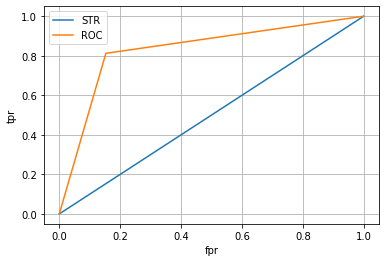

In [55]:
fprs, tprs, thresholds = roc_curve(y_test,test_predict_downsampled)
plt.plot([0,1],[0,1],label = 'STR')
plt.plot(fprs, tprs,label='ROC')

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.grid()
plt.show()




In [58]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

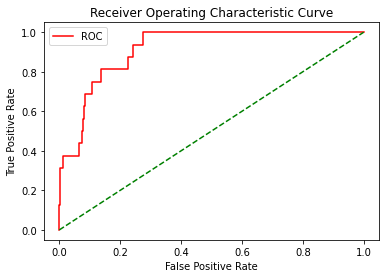

In [59]:
prob = model_3.predict_proba(x_test_robustScaled)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

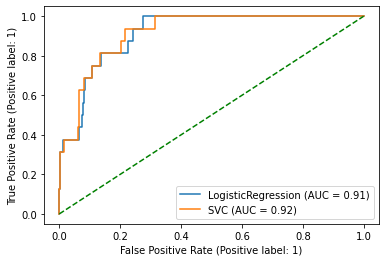

In [63]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(model_3, x_test_robustScaled, y_test, ax = ax)
log_dip = RocCurveDisplay.from_estimator(svc,x_test_robustScaled, y_test, ax=ax)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()